# Wordle musings

This examines traits of words; letter frequency, starting letter, and repeated letters. Starting point is the North American Scrabble Player's official word list: http://www.scrabbleplayers.org/w/NASPA_Zyzzyva_Linux_Installation. Focus is on five letter words.

## Letter Frequencies

This first bit of code calculates letter frequencies for all words, for all five letter words, and for all non-plural five letter words. The non-plural analysis is based on the observation that plural words rarely, if ever, show up as answers in Wordle puzzles. The method used for determining if a word is plural, to wit the last letter is an 'S', is admittedly primitive. E.g. 'ABYSS' and 'BRASS' are not plural.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

# British dictionary
file_name = 'NASPA_CSW21.txt'

# North American dictionary
# file_name = 'NWL2020.txt'

alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
all_five_letter_words = []
all_words_letters = {}
all_words_count = 0
all_words_letters_count = 0
five_letter_words_letters = {}
five_letter_words_count = 0
five_letter_words_letters_count = 0
five_letter_no_plurals_letters = {}
five_letter_no_plurals_count = 0
five_letter_no_plurals_letters_count = 0
start_letters = {}
start_letters_count = 0

for letter in alphabet:
    all_words_letters[letter] = 0
    five_letter_words_letters[letter] = 0
    five_letter_no_plurals_letters[letter] = 0
    start_letters[letter] = 0

words = open(file_name, 'r')
for entry in words:
    space = entry.find(' ')
    if space < 0:
        word = entry
    else:
        word = entry[0:space]
    all_words_count += 1
    trimmed_word = word.strip().upper()
    for letter in trimmed_word:
        all_words_letters[letter] = all_words_letters[letter] + 1
        all_words_letters_count += 1
    if len(trimmed_word) == 5:
        all_five_letter_words.append(trimmed_word)
        five_letter_words_count += 1
        for letter in trimmed_word:
            five_letter_words_letters[letter] = five_letter_words_letters[letter] + 1
            five_letter_words_letters_count += 1
        if trimmed_word[4] != 'S':
            five_letter_no_plurals_count += 1
            for letter in trimmed_word:
                five_letter_no_plurals_letters[letter] = five_letter_no_plurals_letters[letter] + 1
                five_letter_no_plurals_letters_count += 1
            start_letters[trimmed_word[0]] = start_letters[trimmed_word[0]] + 1
            start_letters_count += 1

words.close()
all_words_letter_sorted_counts = sorted(all_words_letters.items(), key=lambda x:x[1])
five_letter_words_letter_sorted_counts = sorted(five_letter_words_letters.items(), key=lambda x:x[1])
five_letter_no_plurals_letter_sorted_counts = sorted(five_letter_no_plurals_letters.items(), key=lambda x:x[1])
start_letters_sorted_counts = sorted(start_letters.items(), key=lambda x:x[1])
print('All Words: %s' % all_words_count)
print('All 5 Letter Words: %s' % five_letter_words_count)
print('All Non-Plural 5 Letter Words: %s' % five_letter_no_plurals_count)

All Words: 279077
All 5 Letter Words: 12915
All Non-Plural 5 Letter Words: 8971


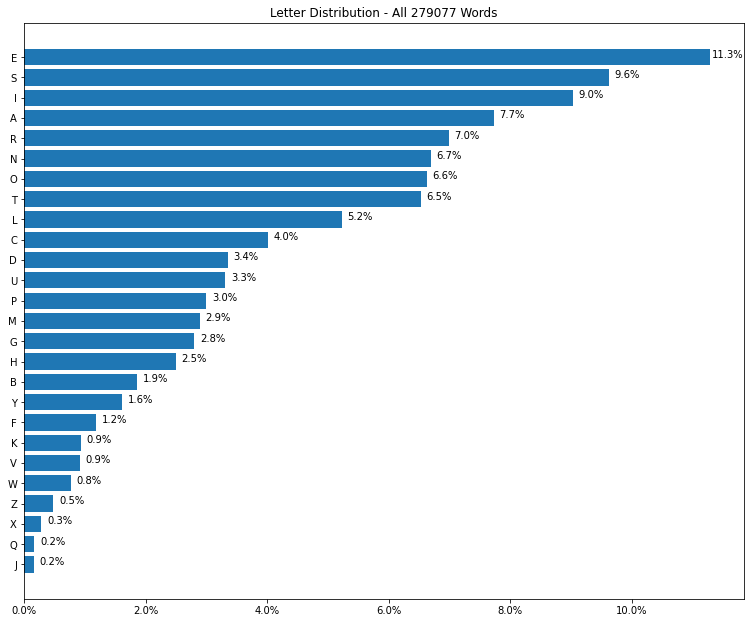

In [4]:
letters = []
averages = []
for item in all_words_letter_sorted_counts:
    letters.append(item[0])
    averages.append(item[1]/all_words_letters_count*100)

fig = plt.figure(figsize=(10.0,8.0))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Letter Distribution - All %s Words' % all_words_count)
ax.barh(letters,averages)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
for i in range(0, len(averages)):
    plt.text(averages[i] + 0.3, i,  "{:.1f}%".format(averages[i]), ha='center')
plt.show()

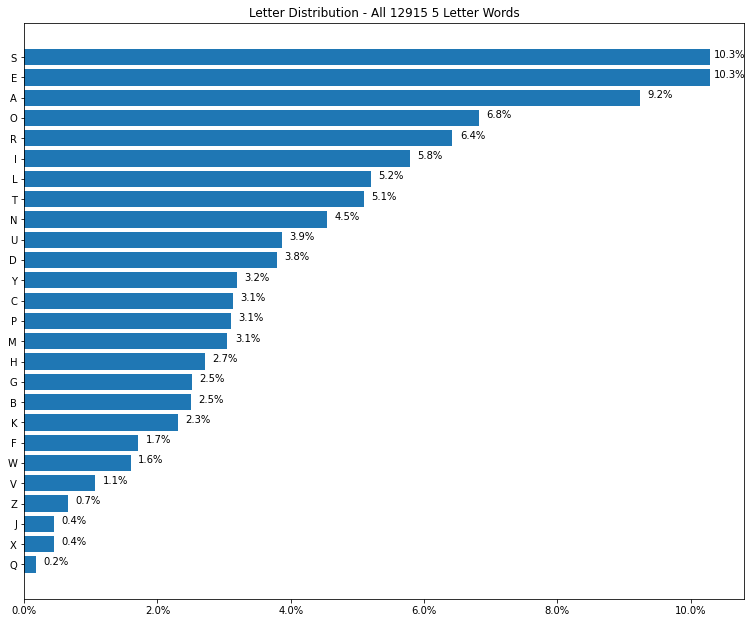

In [5]:
letters = []
averages = []
for item in five_letter_words_letter_sorted_counts:
    letters.append(item[0])
    averages.append(item[1]/five_letter_words_letters_count*100)

fig = plt.figure(figsize=(10.0,8.0))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Letter Distribution - All %s 5 Letter Words' % five_letter_words_count)
ax.barh(letters,averages)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
for i in range(0, len(averages)):
    plt.text(averages[i] + 0.3, i,  "{:.1f}%".format(averages[i]), ha='center')
plt.show()

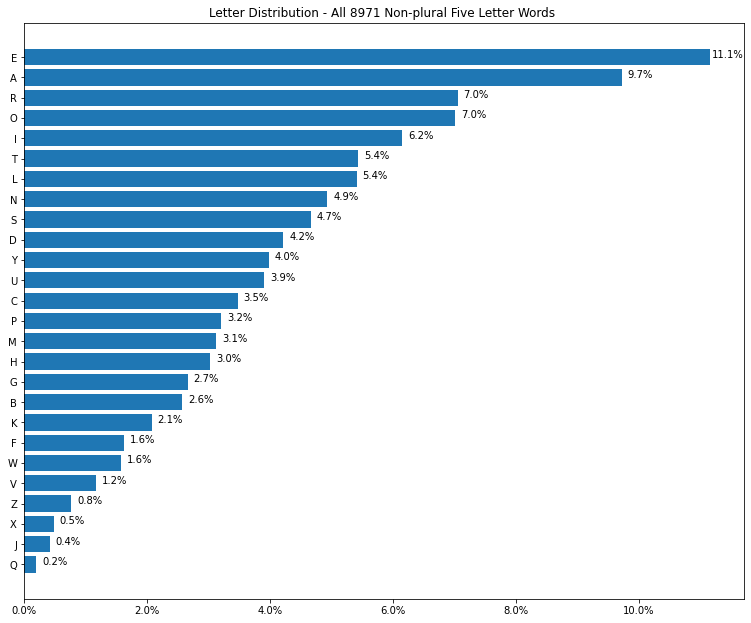

In [6]:
letters = []
averages = []
for item in five_letter_no_plurals_letter_sorted_counts:
    letters.append(item[0])
    averages.append(item[1]/five_letter_no_plurals_letters_count*100)

fig = plt.figure(figsize=(10.0,8.0))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Letter Distribution - All %s Non-plural Five Letter Words ' % five_letter_no_plurals_count)
ax.barh(letters,averages)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
for i in range(0, len(averages)):
    plt.text(averages[i] + 0.3, i,  "{:.1f}%".format(averages[i]), ha='center')
plt.show()

## Starting Letters

Next, look at frequency of starting letters for non-plural five letter words. 

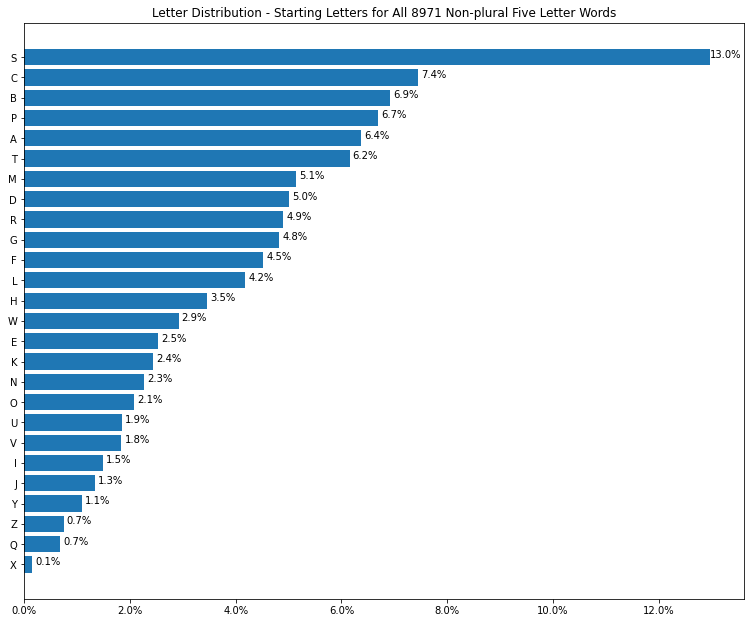

In [7]:
letters = []
averages = []
for item in start_letters_sorted_counts:
    letters.append(item[0])
    averages.append(item[1]/start_letters_count*100)

fig = plt.figure(figsize=(10.0,8.0))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Letter Distribution - Starting Letters for All %s Non-plural Five Letter Words' % five_letter_no_plurals_count)
ax.barh(letters,averages)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
for i in range(0, len(averages)):
    plt.text(averages[i] + 0.3, i,  "{:.1f}%".format(averages[i]), ha='center')
plt.show()

## Prior Wordle Answers

Now we'll do the same analysis on the previous 341 Wordle puzzle answers. 

In [8]:
file_name = 'wordle_history.txt'

wordle_words = []
wordle_words_letters = {}
wordle_words_start_letters = {}
wordle_words_count = 0
wordle_words_letters_count = 0
wordle_words_start_letters_count = 0

for letter in alphabet:
    wordle_words_letters[letter] = 0
    wordle_words_start_letters[letter] = 0

words = open(file_name, 'r')
for line in words:
    word = line[len(line)-6:]
    wordle_words_count += 1
    trimmed_word = word.strip().upper()
    wordle_words.append(trimmed_word)
    wordle_words_start_letters[trimmed_word[0]] = wordle_words_start_letters[trimmed_word[0]] + 1
    wordle_words_start_letters_count += 1
    for letter in trimmed_word:
        wordle_words_letters[letter] = wordle_words_letters[letter] + 1
        wordle_words_letters_count += 1
words.close()

wordle_words_letter_sorted_counts = sorted(wordle_words_letters.items(), key=lambda x:x[1])
wordle_words_start_letters_sorted_counts = sorted(wordle_words_start_letters.items(), key=lambda x:x[1])
print('Wordle Words: %s' % wordle_words_count)

Wordle Words: 431


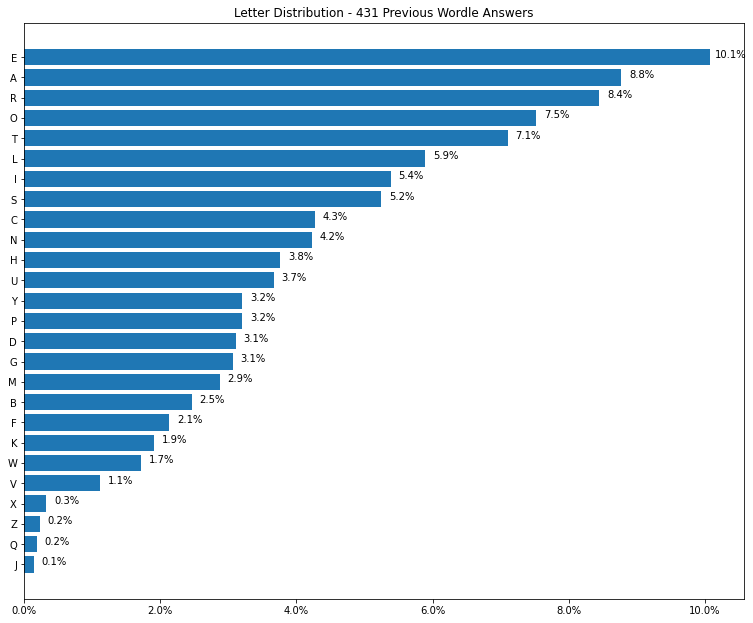

In [9]:
letters = []
averages = []
for item in wordle_words_letter_sorted_counts:
    letters.append(item[0])
    averages.append(item[1]/wordle_words_letters_count*100)

fig = plt.figure(figsize=(10.0,8.0))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Letter Distribution - %s Previous Wordle Answers' % len(wordle_words))
ax.barh(letters,averages)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
for i in range(0, len(averages)):
    plt.text(averages[i] + 0.3, i,  "{:.1f}%".format(averages[i]), ha='center')
plt.show()

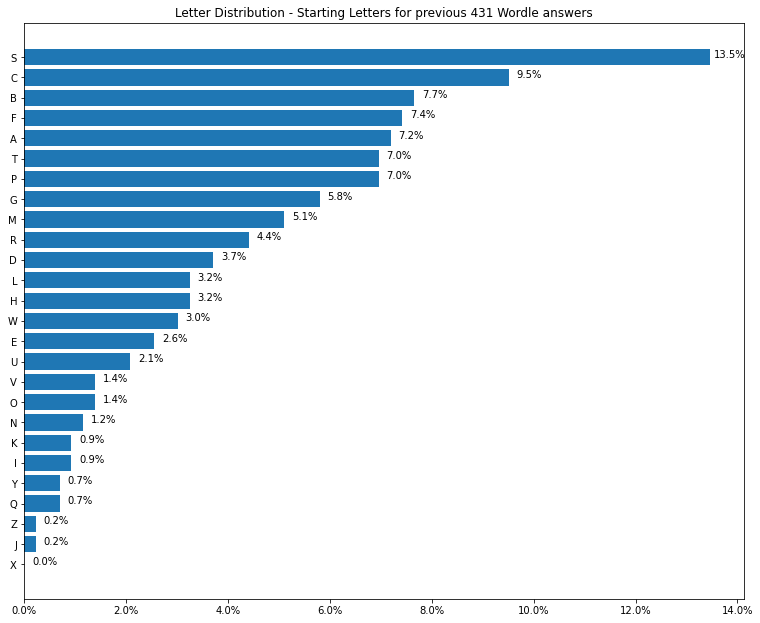

In [10]:
letters = []
averages = []
for item in wordle_words_start_letters_sorted_counts:
    letters.append(item[0])
    averages.append(item[1]/wordle_words_start_letters_count*100)

fig = plt.figure(figsize=(10.0,8.0))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Letter Distribution - Starting Letters for previous %s Wordle answers' % len(wordle_words))
ax.barh(letters,averages)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
for i in range(0, len(averages)):
    plt.text(averages[i] + 0.4, i,  "{:.1f}%".format(averages[i]), ha='center')
plt.show()

## Repeated Letters

This bit of code looks at five letter words to determine how often letters are repeated in a word, for all five letter words, for non-plural five letter words, and for the previous Wordle answers. 

In [11]:
def repeated_letters(word):
    letters_repeated = set()
    if len(word) != len(set(word)):
        # This means at least one letter is repeated
        word_letters = list(word)
        for letter in word:
            word_letters.remove(letter)
            if letter in word_letters:
                letters_repeated.add(letter)

    return letters_repeated
    
five_letter_words_repeated_letters = {}
five_letter_words_repeated_letters_words_count = 0
five_letter_no_plurals_repeated_letters = {}
five_letter_no_plurals_repeated_letters_words_count = 0
wordle_words_repeated_letters = {}
wordle_words_repeated_letters_words_count = 0

for letter in alphabet:
    five_letter_words_repeated_letters[letter] = 0
    five_letter_no_plurals_repeated_letters[letter] = 0
    wordle_words_repeated_letters[letter] = 0

for word in all_five_letter_words:
    letters_repeated = repeated_letters(word)
    if len(letters_repeated) > 0:
        if word[4] == 'S':
            five_letter_words_repeated_letters_words_count += 1
        else:
            five_letter_no_plurals_repeated_letters_words_count += 1
        for letter in letters_repeated:
            if word[4] == 'S':
                five_letter_words_repeated_letters[letter] = five_letter_words_repeated_letters[letter] + 1
            else:
                five_letter_no_plurals_repeated_letters[letter] = five_letter_no_plurals_repeated_letters[letter] + 1

for word in wordle_words:
    letters_repeated = repeated_letters(word)
    if len(letters_repeated) > 0:
        wordle_words_repeated_letters_words_count += 1
        for letter in letters_repeated:
            wordle_words_repeated_letters[letter] = wordle_words_repeated_letters[letter] + 1

five_letter_words_repeated_letters_sorted = sorted(five_letter_words_repeated_letters.items(), key=lambda x:x[1])
five_letter_no_plurals_repeated_letters_sorted = sorted(five_letter_no_plurals_repeated_letters.items(), key=lambda x:x[1])
wordle_words_repeated_letters_sorted = sorted(wordle_words_repeated_letters.items(), key=lambda x:x[1])

print("Percentage of 5 letter words that repeat letters: {:.1f}%".format(five_letter_words_repeated_letters_words_count/five_letter_words_count*100))
print("Percentage of non-plural 5 letter words that repeat letters: {:.1f}%".format(five_letter_no_plurals_repeated_letters_words_count/five_letter_no_plurals_count*100))
print("Percentage of past wordle words that repeat letters: {:.1f}%".format(wordle_words_repeated_letters_words_count/wordle_words_count*100))

Percentage of 5 letter words that repeat letters: 11.1%
Percentage of non-plural 5 letter words that repeat letters: 35.5%
Percentage of past wordle words that repeat letters: 31.1%


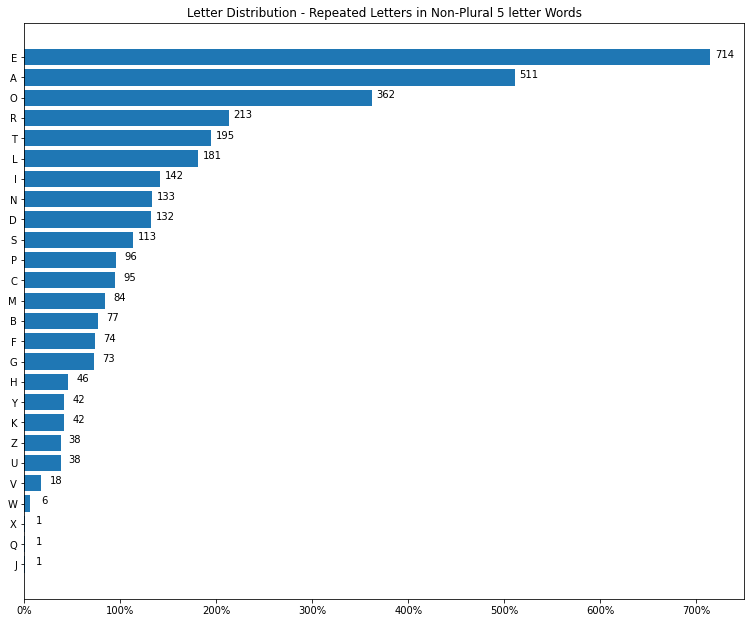

In [12]:
letters = []
counts = []
for item in five_letter_no_plurals_repeated_letters_sorted:
    letters.append(item[0])
    counts.append(item[1])

fig = plt.figure(figsize=(10.0,8.0))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Letter Distribution - Repeated Letters in Non-Plural 5 letter Words')
ax.barh(letters,counts)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
for i in range(0, len(counts)):
    plt.text(counts[i] + 15, i, counts[i], ha='center')
plt.show()

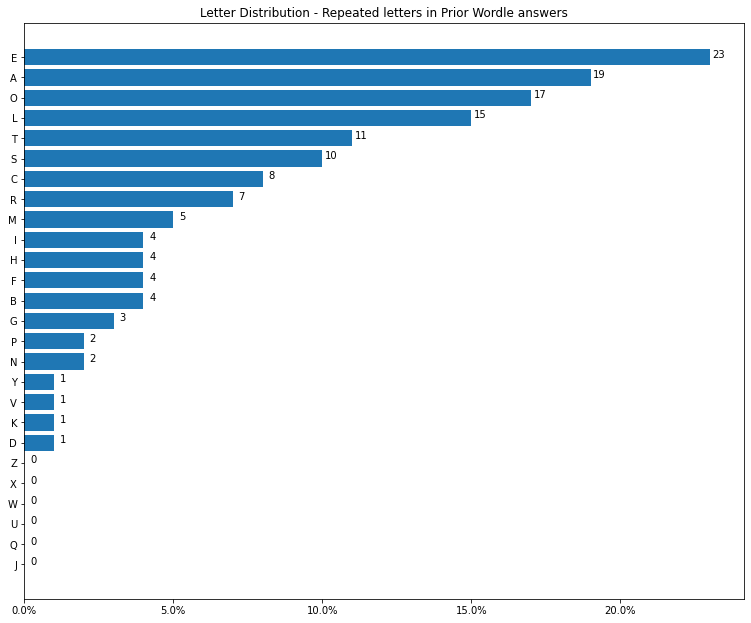

In [13]:
letters = []
counts = []
for item in wordle_words_repeated_letters_sorted:
    letters.append(item[0])
    counts.append(item[1])

fig = plt.figure(figsize=(10.0,8.0))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Letter Distribution - Repeated letters in Prior Wordle answers')
ax.barh(letters,counts)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
for i in range(0, len(counts)):
    plt.text(counts[i] + 0.3, i, counts[i], ha='center')
plt.show()

## Finding Optimal Starts for Quordle

Purpose of this bit of code is to find the best starting attempts for Quordle. One gets 9 attempts. What we want to do is to find three 5 letter words that use 15 different letters. Further, only two vowells and the remaining 13 consonants need to be the 13 most common consontants. 

In [14]:
from itertools import combinations

# The most common letters have the vowells removed and are in reverse order
most_common_letters = set(['B', 'G', 'H', 'M', 'P', 'C', 'Y', 'D', 'S', 'N', 'L', 'T', 'R'])
vowells = set(['A', 'E', 'I', 'O', 'U'])

candidate_words = []
for word in all_five_letter_words:
    if word[4] != 'S':
        # We know this is a 5 letter word and that it is not plural (crude approach)
        letters = set(word)
        if len(letters) == 5 and len(letters.intersection(vowells)) <= 1:
            # We know no letters are repeated and that it contains at mnost one vowell
            consonants = letters - vowells
            if len(consonants) == len(consonants.intersection(most_common_letters)):
                # Now we know that all the consonants are in the set of most common
                candidate_words.append(word)

print('Proceeding with %s of %s 5 letter words.'  % (len(candidate_words), len(all_five_letter_words)))

count = 0
for trio in combinations(candidate_words, 3):
    count += 1
    letters = set()
    for word in trio:
        letters = letters.union(set(word))
    word_consonants = letters.intersection(most_common_letters)
    word_vowells = letters.intersection(vowells)
    if len(word_consonants) >= 13 and len(word_vowells) >= 2:
        print(trio)
        print(letters)
        print(word_consonants)
        print(word_vowells)
    if count % 10000000 == 0:
        print("Completed %sM." % int(count/1000000))





Proceeding with 830 of 12915 5 letter words.
('BANDH', 'GRYPT', 'SCLIM')
{'S', 'N', 'Y', 'M', 'B', 'L', 'I', 'A', 'T', 'G', 'P', 'D', 'H', 'C', 'R'}
{'N', 'M', 'Y', 'B', 'L', 'T', 'G', 'S', 'P', 'D', 'H', 'C', 'R'}
{'A', 'I'}
Completed 10M.
('BLAND', 'GRYPT', 'MISCH')
{'S', 'N', 'Y', 'L', 'B', 'M', 'I', 'A', 'T', 'G', 'P', 'D', 'H', 'C', 'R'}
{'N', 'M', 'Y', 'B', 'L', 'T', 'G', 'S', 'P', 'D', 'H', 'C', 'R'}
{'A', 'I'}
('BLAND', 'GRYPT', 'SCHMO')
{'S', 'N', 'O', 'Y', 'L', 'B', 'M', 'A', 'T', 'G', 'P', 'D', 'H', 'C', 'R'}
{'N', 'M', 'Y', 'B', 'L', 'T', 'G', 'S', 'P', 'D', 'H', 'C', 'R'}
{'O', 'A'}
('BLAST', 'CHYND', 'GRUMP')
{'N', 'U', 'Y', 'L', 'B', 'M', 'G', 'T', 'A', 'S', 'P', 'D', 'H', 'C', 'R'}
{'N', 'M', 'Y', 'B', 'L', 'T', 'G', 'S', 'P', 'D', 'H', 'C', 'R'}
{'U', 'A'}
('BLEND', 'CHASM', 'GRYPT')
{'E', 'N', 'M', 'L', 'B', 'Y', 'G', 'A', 'T', 'S', 'P', 'D', 'H', 'C', 'R'}
{'N', 'M', 'Y', 'B', 'L', 'T', 'G', 'S', 'P', 'D', 'H', 'C', 'R'}
{'E', 'A'}
('BLEND', 'GRYPT', 'MISCH')
{'S', '

In [15]:
for word in all_five_letter_words:
    if 'I' in word and 'O' in word and 'U' in word:
        print(word)

AUDIO
AULOI
BIJOU
BITOU
COQUI
CURIO
DUOMI
FUGIO
GUIRO
HOURI
LOUIE
LOUIS
MIAOU
OCULI
ODIUM
ONIUM
OPIUM
OUBIT
OUIJA
OURIE
PIOUS
POILU
QUINO
QUIPO
QUOIF
QUOIN
QUOIT
UNION
